# SENTIMENT SCORING CHALLENGE

**File:** SentimentChallenge.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# CHALLENGE

In this challenge, I invite you to to do the following:

1. Import the text `LittleWomen.txt` by Louisa May Alcott from the data folder (this text is downloaded from Project Gutenberg at https://www.gutenberg.org/ebooks/514.)
1. Add section numbers for sections of 100 lines.
1. Tokenize the data.
1. Score the sentiments.
1. Calculate average sentiment scores for each section of 100 lines.
1. Graph the "sentiment arc" of the story.

Once `afinn` is installed, then load the libraries below.

In [1]:
# Import libraries
import re  # For regular expressions
import nltk  # For text functions
import matplotlib.pyplot as plt  # For plotting
import pandas as pd  # For dataframes
from afinn import Afinn  # For sentiment values

# Import corpora and functions from NLTK
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

# Download data for NLTK
nltk.download('stopwords', quiet=True)
nltk.download('opinion_lexicon', quiet=True)
nltk.download('punkt', quiet=True)

# Use Matplotlib style sheet
plt.style.use('ggplot')

# IMPORT DATA

In [2]:
df = pd.read_csv('data/LittleWomen.txt',sep='\t')\
    .dropna()\
    .drop('gutenberg_id', axis=1)

df.head(10)

,text
0,LITTLE WOMEN
3,by
5,Louisa May Alcott
10,CONTENTS
13,PART 1
15,ONE PLAYING PILGRIMS
16,TWO A MERRY CHRISTMAS
17,THREE THE LAURENCE BOY
18,FOUR BURDENS
19,FIVE BEING NEIGHBORLY


# PREPARE DATA


## Add Line Numbers

- These numbers will be used to divide the text into sections.

In [3]:
df['line'] = range(1, len(df) + 1)

df.head()

,text,line
0,LITTLE WOMEN,1
3,by,2
5,Louisa May Alcott,3
10,CONTENTS,4
13,PART 1,5


## Tokenize the Data

In [4]:
def clean_text(text):
    text = text.lower()  # Convert all text to lowercase
    text = text.replace("'", '')
    text = re.sub(r'[^\w]', ' ', text)  # Leave only word characters
    text = re.sub(r'\s+', ' ', text)  # Omit extra space characters
    text = text.strip()
    return text

df['text'] = df['text'].map(clean_text) 
df['text'] = df['text'].map(word_tokenize) # Split text into word tokens

df.head()

,text,line
0,"[little, women]",1
3,[by],2
5,"[louisa, may, alcott]",3
10,[contents],4
13,"[part, 1]",5


## Collect Tokens into a Single Series

In [5]:
df = df.explode('text').rename(columns={'text': 'token'})

df.head(10)

,token,line
0,little,1
0,women,1
3,by,2
5,louisa,3
5,may,3
5,alcott,3
10,contents,4
13,part,5
13,1,5
15,one,6


# SCORE SENTIMENTS

- Calculate sentiment scores using the AFINN lexicon, which scores words on a scale of -5 (most negative) to +5 (most positive).

In [6]:
afinn_scorer = Afinn()

df['score'] = df['token'].map(afinn_scorer.score).astype(int)
df = df[df['score'] != 0]

- Show a frequency table for the sentiment scores.

In [7]:
score_freq = df.score.value_counts().sort_index().to_frame('n')

score_freq

,n
score,
-5,2
-4,20
-3,769
-2,3237
-1,1856
1,2343
2,4815
3,2842
4,192


## Graph Score Frequencies

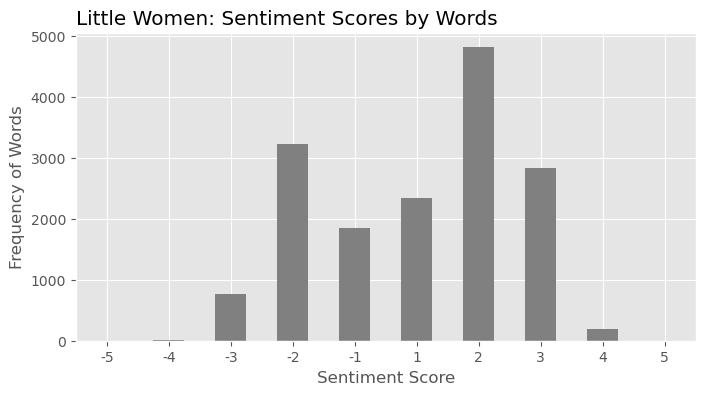

In [8]:
score_freq.plot.bar(
    legend=False,
    figsize=(8, 4),
    grid=True,
    color='gray')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency of Words')
plt.title('Little Women: Sentiment Scores by Words', loc='left')
plt.xticks(rotation=0);

# SENTIMENT ARC

- Divide the text into sections of 100 lines and calculate a sentiment score for each section.

In [9]:
score_acc = df.groupby(df['line'] // 100)\
    .score.mean()\
    .to_frame('score')\
    .rename_axis('section')

score_acc.head(10)

,score
section,
0,0.020408
1,0.362745
2,0.619565
3,0.500000
4,0.871795
5,0.823529
6,0.512821
7,1.082353
8,0.041667


## Plot Scores by Section to View Narrative Arc

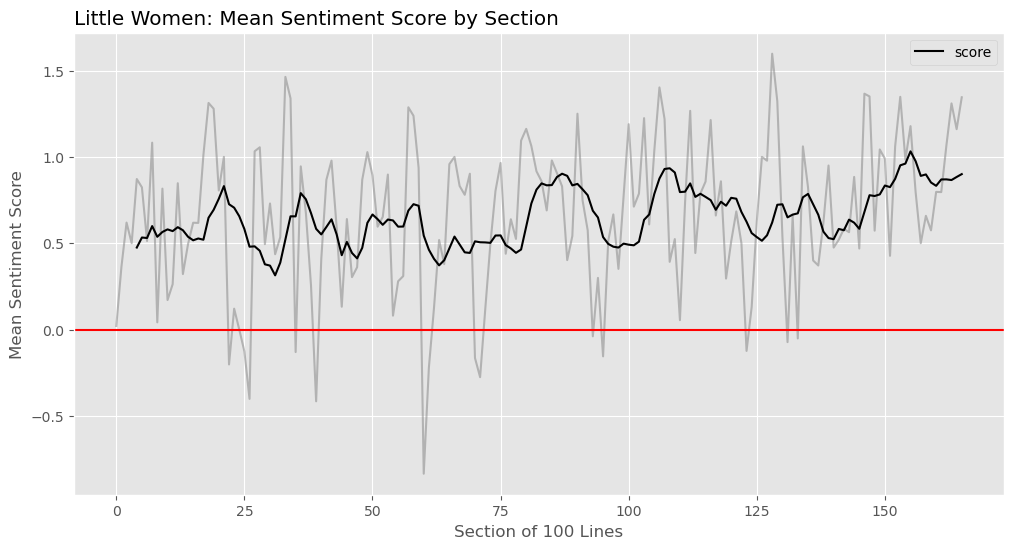

In [11]:
ax = score_acc.plot.line(legend=False, figsize=(12, 6), grid=True, alpha=0.5, color='gray')
score_acc.rolling(10, min_periods=5).mean().plot.line(ax=ax, color='black')
plt.xlabel('Section of 100 Lines')
plt.ylabel('Mean Sentiment Score')
plt.title('Little Women: Mean Sentiment Score by Section', loc='left')
plt.axhline(0, color='red')
plt.xticks(rotation=0);

# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.